In [0]:
# Author                 :  Mohammad Noor Ul hasan
# Start Date             :  01/Feb/19

# Dependencies(Modules ) :  opencv(cv2) -> to perform image processing
#                           glob to load dataset
# Optional Dependency    :  matplotlib -> to view images in notebook

# Last Edited            :  07/Feb/19

In [1]:
!git clone https://github.com/mohammadnoorulhasan/licence-plate-recognition.git

Cloning into 'licence-plate-recognition'...
remote: Enumerating objects: 91, done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 91
Unpacking objects: 100% (91/91), done.


In [2]:
!ls

licence-plate-recognition  sample_data


In [3]:
cd licence-plate-recognition/

/content/licence-plate-recognition


In [4]:
!ls

 dataset  'Licence Plate Recognition.ipynb'   output   README.md


## Import necessary libraries


In [0]:
import cv2
from matplotlib import pyplot as plt
import glob

In [0]:
def display(image_object):
    """
        Display Image using Matplotlib
        @parms image_object : A numpy array which stores image
    
    """
    fig,ax = plt.subplots(1, figsize=(20,20)) # Setting figure attibutes
    ax.imshow(image_object,cmap='gray') # Showing the Image
    plt.show()

def display_cv2(image_object, window_name = "Image"):
    """
        Display Image using cv2
        @parms image_object : A numpy array which stores image
        @parms window_name  : A string name which is named as the window of the image
    """
    cv2.imshow(window_name, image_object) # Display the image
    cv2.waitKey(0) # Waiting for user to type any key
    cv2.destroyWindow(window_name) # As the user press key the "window_name" will be destroyed  

In [0]:
class DetectLicencePlateRegion:
    """
        This class detect the Licence Plate region
        Signature DetectLicencePlateRegion( self, filename, autorun = True, displayImages = 1 )
        @params filename      :  A string which stores input file address including its name
        @params autorun       :  A Boolean value ( True / False ) default : True
                                 True  : It will automatically call the methods
                                 False : The programmer will call the methods manually
        @params displayImages :  A Integer value ( 0 / 1 / 2 ) default : 1
                                 0 : It will stop to display images in the notebook
                                 1 : It will display images in the notebook using matplotlib
                                 2 : It will display images using cv2.imshow()
    """
    def __init__( self, filename, autorun = True, displayImages = 1 ):
        """
        Signature DetectLicencePlateRegion( self, filename, autorun = True, displayImages = 1 )
        @params filename      :  A string which stores input file address including its name
        @params autorun       :  A Boolean value ( True / False ) default : True
                                 True  : It will automatically call the methods
                                 False : The programmer will call the methods manually
        @params displayImages :  A Integer value ( 0 / 1 / 2 ) default : 1
                                 0 : It will stop to display images in the notebook
                                 1 : It will display images in the notebook using matplotlib
                                 2 : It will display images using cv2.imshow()
        """
        self.filename = filename
        if displayImages not in [0,1,2]: # Checking the value of displayImages it should be in 0,1,2
            # If it is not, then its a error
            print("Error : displayImages value should be in [0,1,2]") 
        else:
            self.displayImages = displayImages
            self.imageObject = cv2.imread( filename ) # Loading image using cv2.imread
            
            if self.imageObject is None: # Checking error that is image is loaded properly or not
                # If its None then image is not loaded properly
                print("Error : cv2.imread() unable to load file :",self.filename)
                self.unableToLoadError = True # Make its status true so that manual calling will get notified
            else:
                self.unableToLoadError = False
                
                # Checking how programmer want to display image.
                if self.displayImages is 1:   
                    display(self.imageObject)
                elif self.displayImages is 2:
                    display_cv2(self.imageObject,"Original Picture")
                   
                # If user want to autorun the code.
                if autorun:
                    self.autorun()
    
    def getGrayScaleImage(self, imageObject):
        """
            Signature getGrayScaleImage(self, imageObject)
            @params imageObject : A image or array which you want to convert in gray scale.
        """
        self.__grayScaleImageObject = cv2.cvtColor(imageObject, cv2.COLOR_BGR2GRAY)
    
    def getBlurredImage(self, imageObject):
        """
            Signature getBlurredImage(self, imageObject)
            @params imageObject : A image or array which you want to make blurred.
        """
        self.__blurredImageObject = cv2.GaussianBlur(imageObject, (5, 5), 0)
    
    def getEdgesFromImage(self, imageObject):
        """
            Signature getEdgesFromImage(self, imageObject)
            @params imageObject : A image or array which you want in canny/edge form.
        """
        self.__edgesImageObject = cv2.Canny(imageObject, 0, 100)
    
    def getContoursFromImage(self, imageObject):
        """
            Signature getContoursFromImage(self, imageObject)
            @params imageObject : A image or array whose contour is going to be calculated.
        """
        (contour, _) = cv2.findContours(imageObject, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        self.__contours = contour
        
    def findLicencePLate(self):
        """
            Signature findLicencePLate(self)
        """
        # Assumption
        # height : width ratio should be in between 1:5 to 1:3 
        
        maxHeightWidthRatio = 1/3
        minHeightWidthRatio = 1/5
        
        expectedContourForLicencePLate = [] # List to save contours which are passed by our assumption
        for contour in self.__contours:
            xCoordinate, yCoordinate, width, height = cv2.boundingRect(contour)
            ratio = height / width
            if ( ratio <= maxHeightWidthRatio ) and ( ratio >= minHeightWidthRatio ): # Checking our assumption
                # If it is passed by assumption then append it in our expected list
                expectedContourForLicencePLate.append( contour )
        
        # Sort the expected list
        expectedContourForLicencePLate = sorted( expectedContourForLicencePLate, key=cv2.contourArea, reverse=True )
        # The Contour which have biggest area will be our desired output
        contourForLicencePlate = expectedContourForLicencePLate[0]
        # Calculating its initial coordinate( x, y ), width, height
        self.xCoordinate, self.yCoordinate, self.width, self.height = cv2.boundingRect(contourForLicencePlate)
        
        
    def cutLicencePlateRegion( self, saveOutputFile = True, outputFolderName = "output/" ):
        """
            Signature cutLicencePlateRegion(self, saveOutputFile = True, outputFolderName = "output/" )
            @parms saveOutputFile   : A boolean value ( True / False ) Default : True
                                      True  : It will save automatically image in the memory
                                      False : It will not save automatically image in the memory
            @parms outputFolderName : A string where you want to save your output
                                      Default : \"output/\"
        """

        self.licencePlateImage = self.imageObject[self.yCoordinate:self.yCoordinate+self.height,self.xCoordinate:self.xCoordinate+self.width] # Cropping the image 
        
        # Checking how user want to see cropped image with
        if self.displayImages is 1: 
            # It will open with matplotlib
            display(self.licencePlateImage)
        elif self.displayImages is 2:
            # It will open with cv2
            display_cv2(self.licencePlateImage,"Cropped Image")
        
        if saveOutputFile:
            outputFileName = outputFolderName + self.filename.split("/")[-1]
            cv2.imwrite(outputFileName,self.licencePlateImage) # Saving the output/cropped image
    def getLicencePlateImage(self):
        """
            Signature getLicencePlateImage(self)
            return : cropped image
        """
        return self.licencePlateImage
    
    def autorun(self):
        """
            Signature autorun(self)
        """
        if self.unableToLoadError:
            print("Error : cv2.imread() unable to load file :",self.filename)
            return
        self.getGrayScaleImage(self.imageObject) # Coverting coloured image into gray scale
        self.getBlurredImage(self.__grayScaleImageObject) # Converting gray scale image into blurred form 
        self.getEdgesFromImage(self.__blurredImageObject) # Converting blurred form image into canny form 
        self.getContoursFromImage(self.__edgesImageObject) # Finding contour of the image
        self.findLicencePLate() # Detect the region of the licence plate
        self.cutLicencePlateRegion() # Cropped the licence plate image
        
    

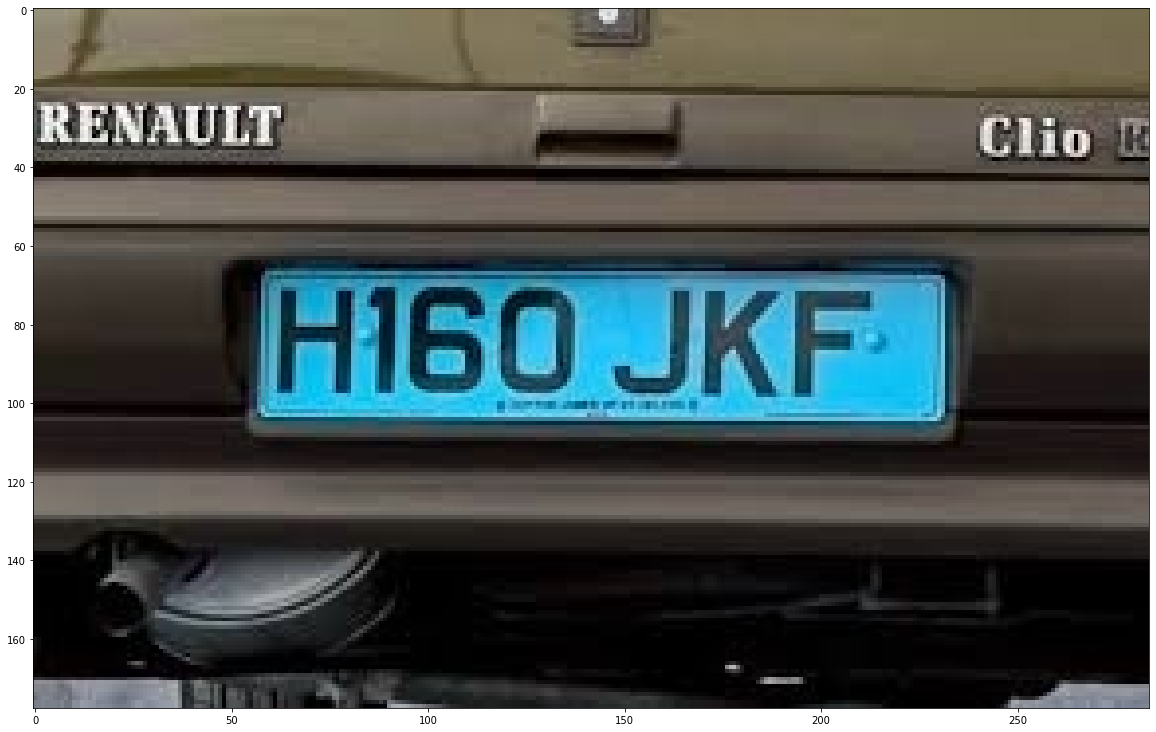

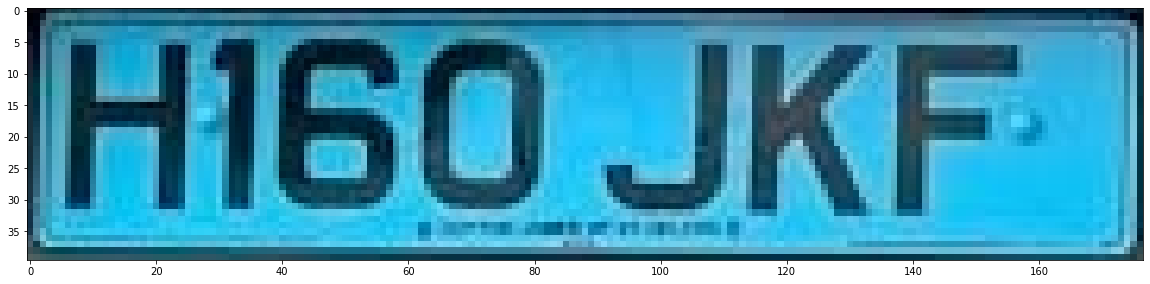

In [8]:
filename = "dataset/car 2.jpg"
detectLicencePlateRegionObject = DetectLicencePlateRegion(filename)

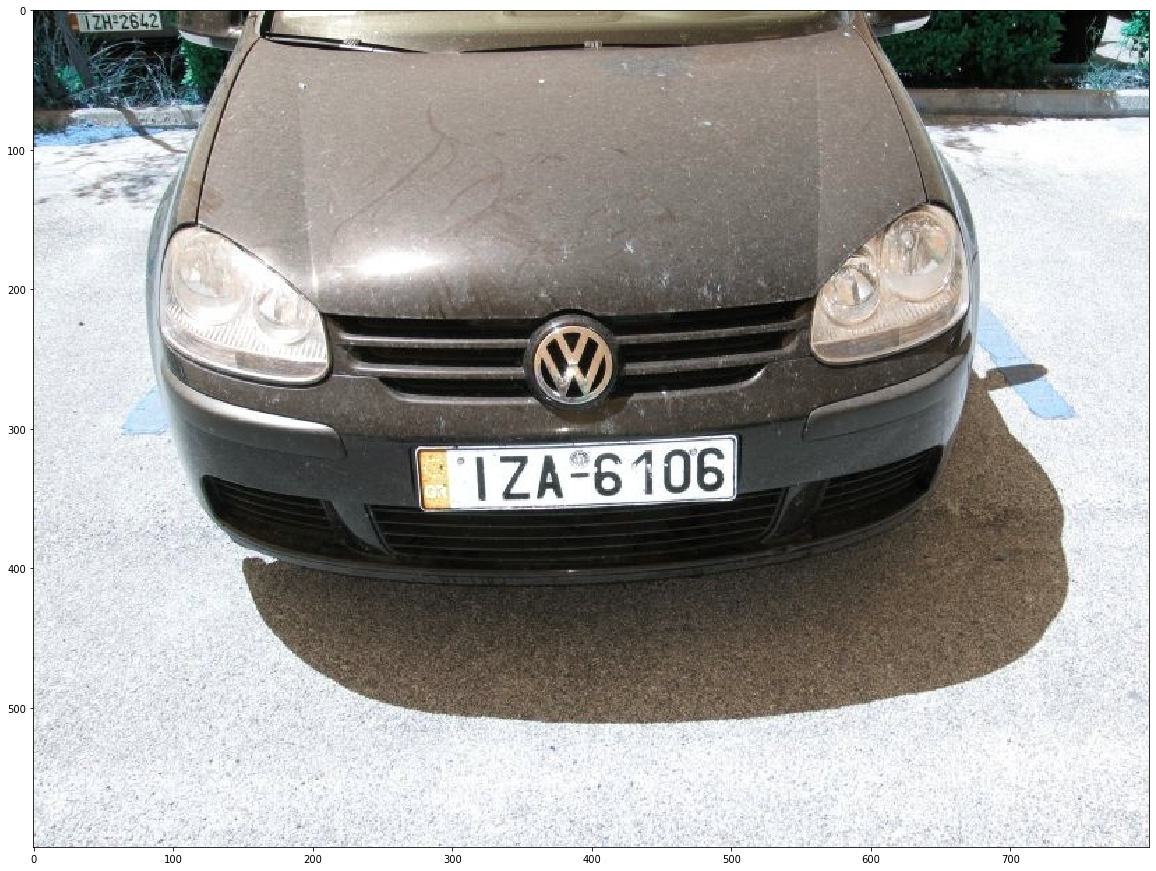

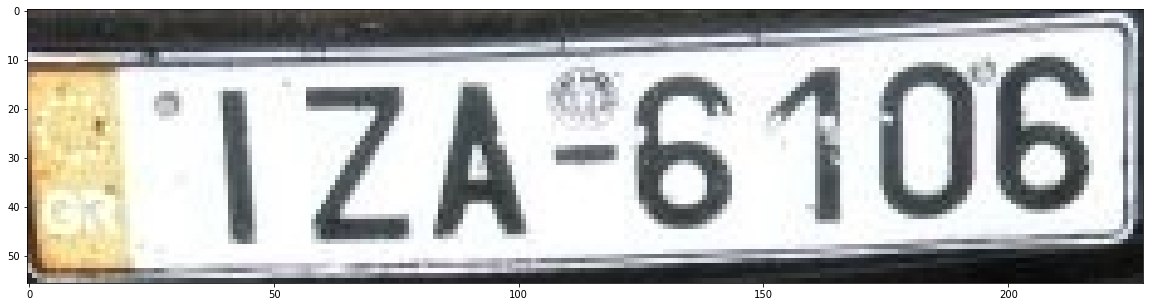

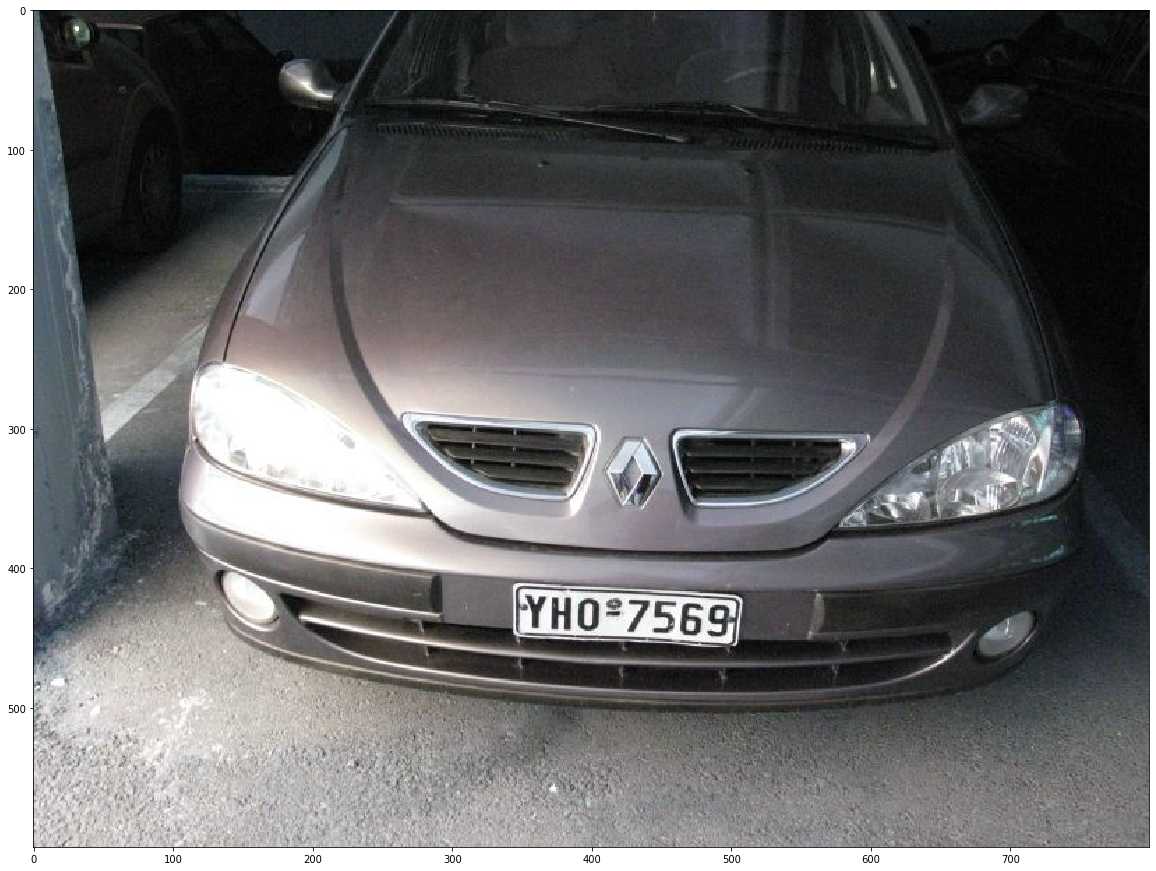

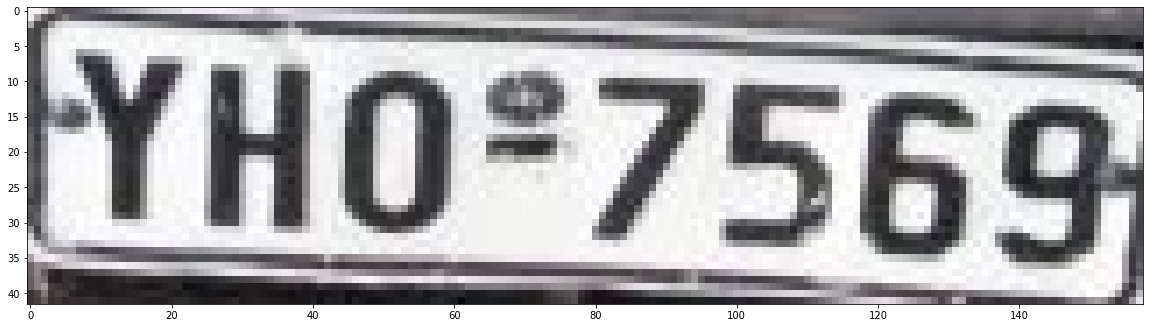

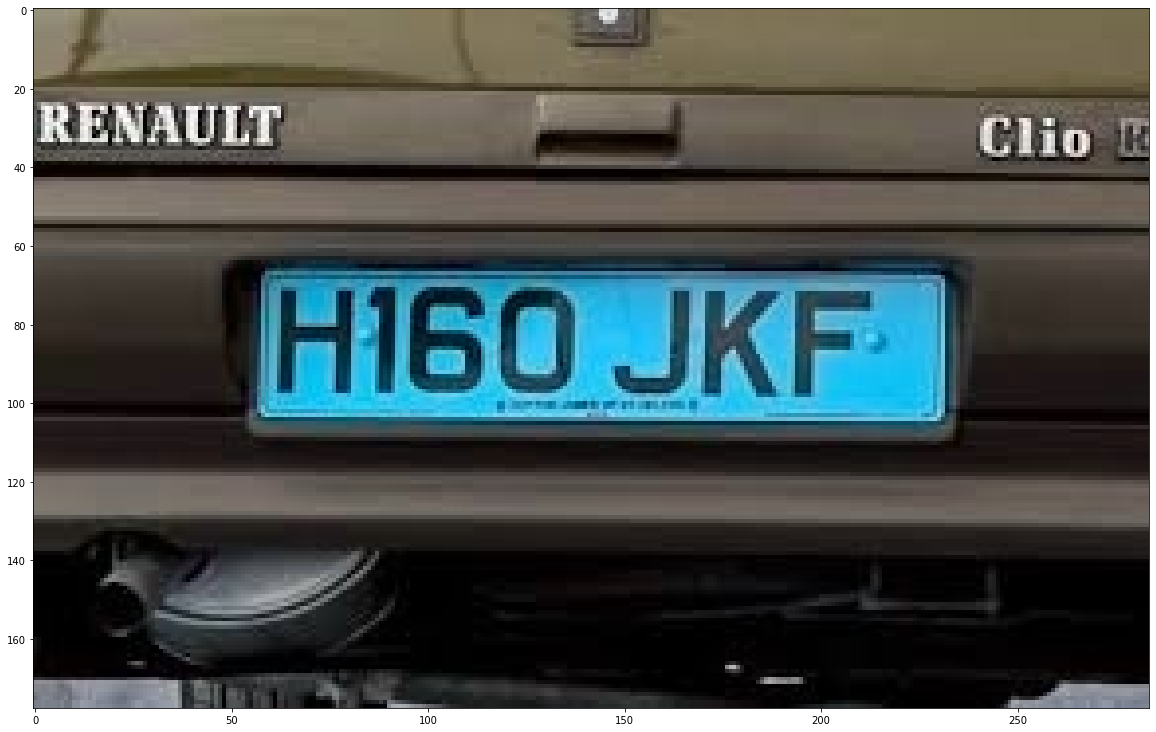

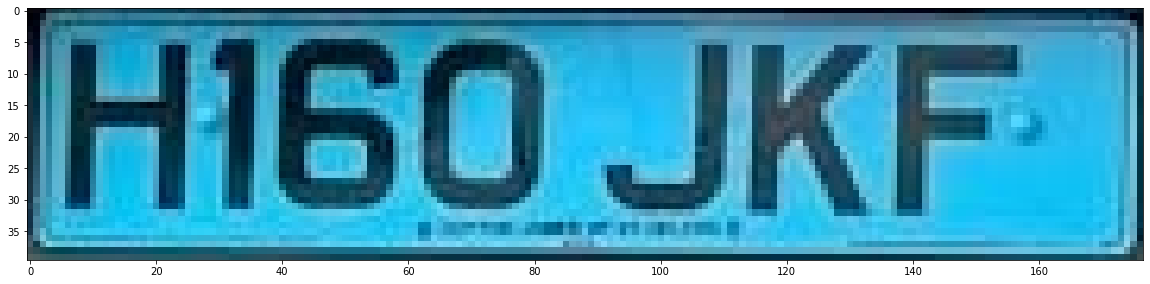

In [0]:
#run this cell if you want to see work with whole dataset
filename_list = glob.glob("dataset/*")
for filename in filename_list:
    detectLicencePlateRegionObject = DetectLicencePlateRegion(filename)